In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # appropriate import to draw 3d polygons
from matplotlib import style

In [2]:
import meshio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

path = "/home/yui/Documents/data/ModelNet10/ModelNet10/bathtub/train/bathtub_0001.off"
mesh = meshio.read(path,file_format="off")

ReadError: File /home/yui/Documents/data/ModelNet10/ModelNet10/bathtub/train/bathtub_0001.off not found.

In [3]:
print(mesh.points[:5])

[[ 18.5143 -29.8765 -23.0382]
 [ 18.5143  29.8734 -23.0382]
 [ 18.5012 -30.0315 -23.2882]
 [ 18.5012  29.975  -23.2882]
 [ 18.5012  30.0315 -23.2882]]


In [4]:
print(mesh.cells[0].data)

[[  13   14   15]
 [  13   19   14]
 [  21   22   23]
 ...
 [3508 3509 3512]
 [3510 3513 3507]
 [3509 3507 3513]]


In [5]:
surfaces = mesh.cells[0].data
vertices = mesh.points

In [6]:
verts = []
for i in surfaces:
    tmx = vertices[i[0]]
    tmy = vertices[i[1]]
    tmz = vertices[i[2]]
    tmp = list(zip(tmx,tmy,tmz))
#     print(tmp)
    verts.append(tmp)

### 1. 

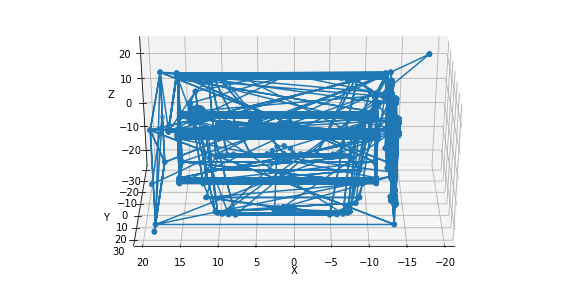

In [7]:
plt.figure(figsize=(10,5))
ax=plt.subplot(111,projection='3d')
ax.scatter(vertices[:,0],vertices[:,1],vertices[:,2])
# ax.plot_surface(vertices[:,0],vertices[:,1],vertices[:,2])
ax.plot(vertices[:,0],vertices[:,1],vertices[:,2])
# srf = Poly3DCollection(verts[:], alpha=0.1, facecolor='b')
# plt.gca().add_collection3d(srf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(30,90)

### 2.

In [8]:
import pygame as pg
from pygame.locals import *

from OpenGL.GL import *
from OpenGL.GLU import *


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
def Read(verticies,surfaces):
    glBegin(GL_TRIANGLES)
    for surface in surfaces:
        x=0
        for vertex in surface:
            x+=1
            glColor3fv(colors[x])
            glVertex3fv(verticies[vertex])
    glEnd()

In [10]:
surfaces = mesh.cells[0].data
verticies = mesh.points

In [11]:
colors = (
    (1,0,0),
    (0,1,0),
    (0,0,1),
    (0,1,0),
    (1,1,1),
    (0,1,1),
    (1,0,0),
    (0,1,0),
    (0,0,1),
    (1,0,0),
    (1,1,1),
    (0,1,1),
    )

In [12]:
pg.init()
display = (1680, 1050)
pg.display.set_mode(display, DOUBLEBUF|OPENGL)

gluPerspective(45, (display[0]/display[1]), 1, 500)

glTranslatef(0.0, 0.0, -100)

while True:
    for event in pg.event.get():
        if event.type == pg.QUIT:
            pg.quit()
            quit()

    glRotatef(1, 1, 1, 1)
    glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
    Read(verticies,surfaces)
    pg.display.flip()
    pg.time.wait(10)


error: video system not initialized

### 3.

In [4]:
import pyvista as pv

In [18]:
mesh = pv.PolyData(vertices)

In [19]:
mesh.length

84.54609526122422

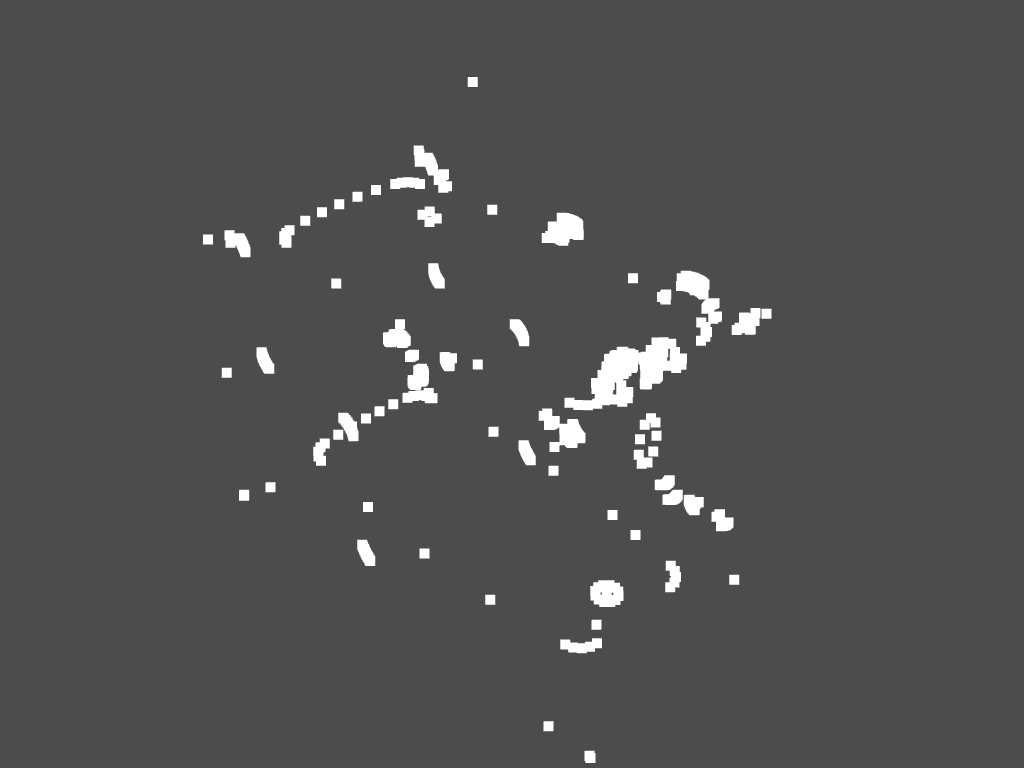

In [10]:
mesh.plot(point_size=10)

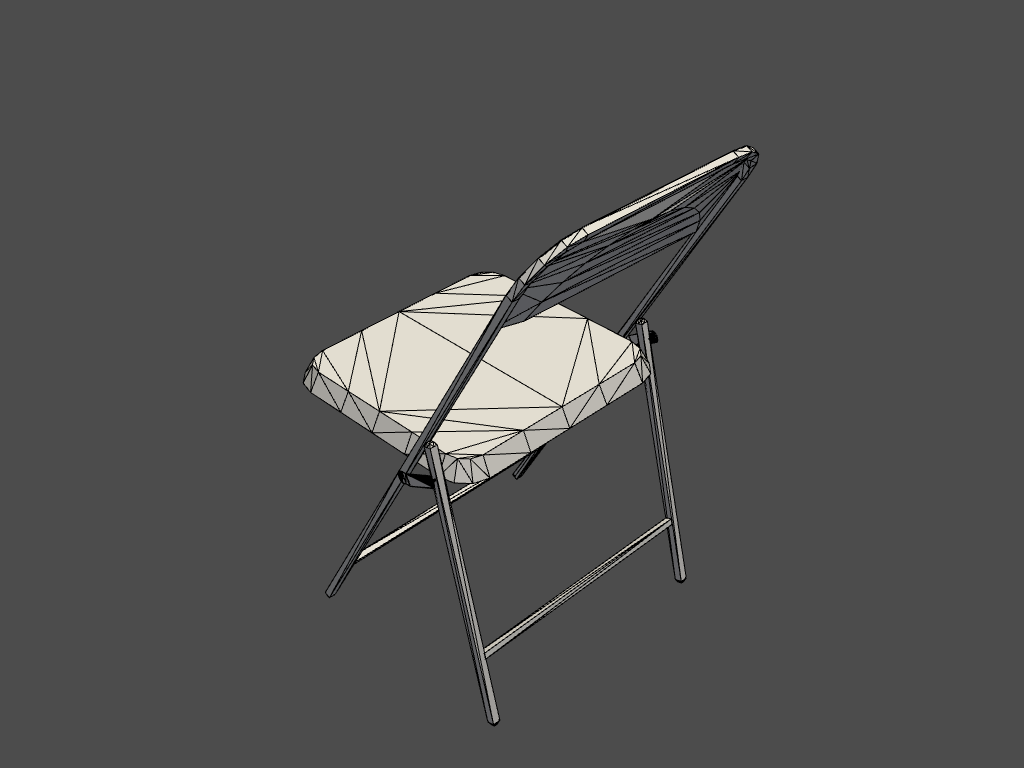

In [5]:
p = pv.Plotter()
path = "/home/yui/Documents/data/ModelNet10/chair/train/chair_0001.off"
mesh = meshio.read(path,file_format="off")
p.add_mesh(mesh,show_edges=True,color='white')
p.show()

In [24]:
mesh

<meshio mesh object>
  Number of points: 3514
  Number of cells:
    triangle: 3546

In [40]:
voxels = pv.voxelize(mesh, density=84.54609526122422/50
                     , check_surface=False)

In [41]:
voxels["density"] = np.full(voxels.n_cells, 3.65) # g/cc
voxels

UnstructuredGrid (0x7fb3bc25e050)
  N Cells:	10855
  N Points:	14317
  X Bounds:	-1.513e+01, 1.700e+01
  Y Bounds:	-3.003e+01, 2.408e+01
  Z Bounds:	-2.329e+01, 1.729e+01
  N Arrays:	3

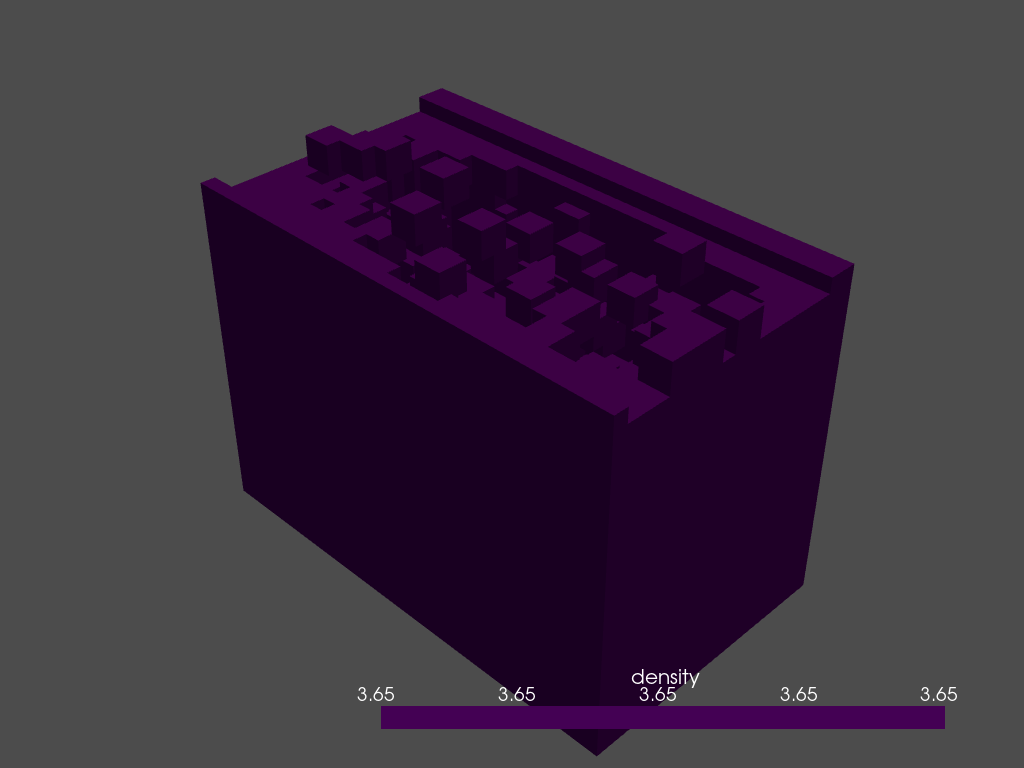

In [42]:
voxels.plot(scalars="density")

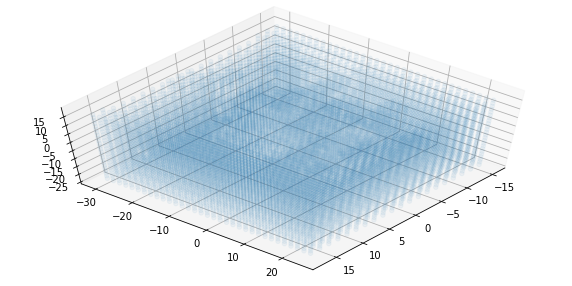

In [49]:
pts = np.array(voxels.points)
plt.figure(figsize=(10,5))
ax=plt.subplot(111,projection='3d')
ax.scatter(pts[:,0],pts[:,1],pts[:,2],alpha=.05)
ax.view_init(60,40)

In [44]:
print(pts.shape)

(14317, 3)


In [13]:
# sphinx_gallery_thumbnail_number = 2
from pyvista import examples
import pyvista as pv
import numpy as np

# Load a surface to voxelize
surface = examples.download_foot_bones()
surface

PolyData,Information
N Cells,4204
N Points,2154
X Bounds,"-5.633e+00, 5.633e+00"
Y Bounds,"-1.860e+00, 1.860e+00"
Z Bounds,"-2.125e+00, 2.126e+00"
N Arrays,0


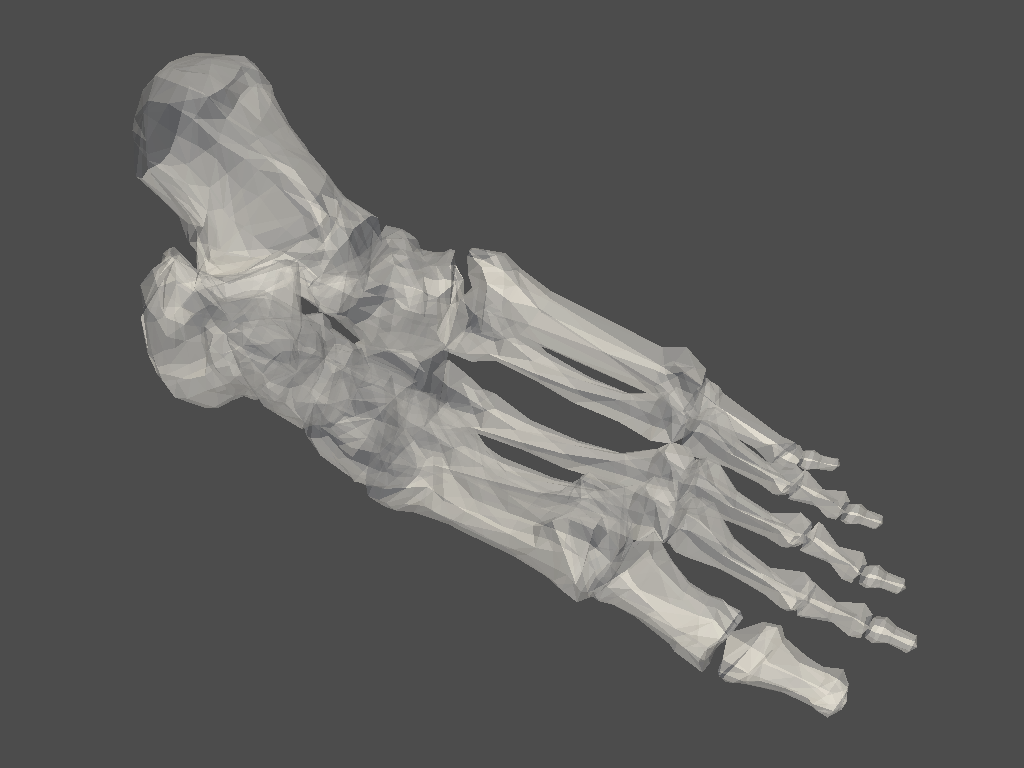

In [14]:
cpos = [(7.656346967151718, -9.802071079151158, -11.021236183314311),
 (0.2224512272564101, -0.4594554282112895, 0.5549738359311297),
 (-0.6279216753504941, -0.7513057097368635, 0.20311105371647392)]

surface.plot(cpos=cpos, opacity=0.75)

In [15]:
surface.points.shape

(2154, 3)

In [16]:
surface.length

12.603420895741175

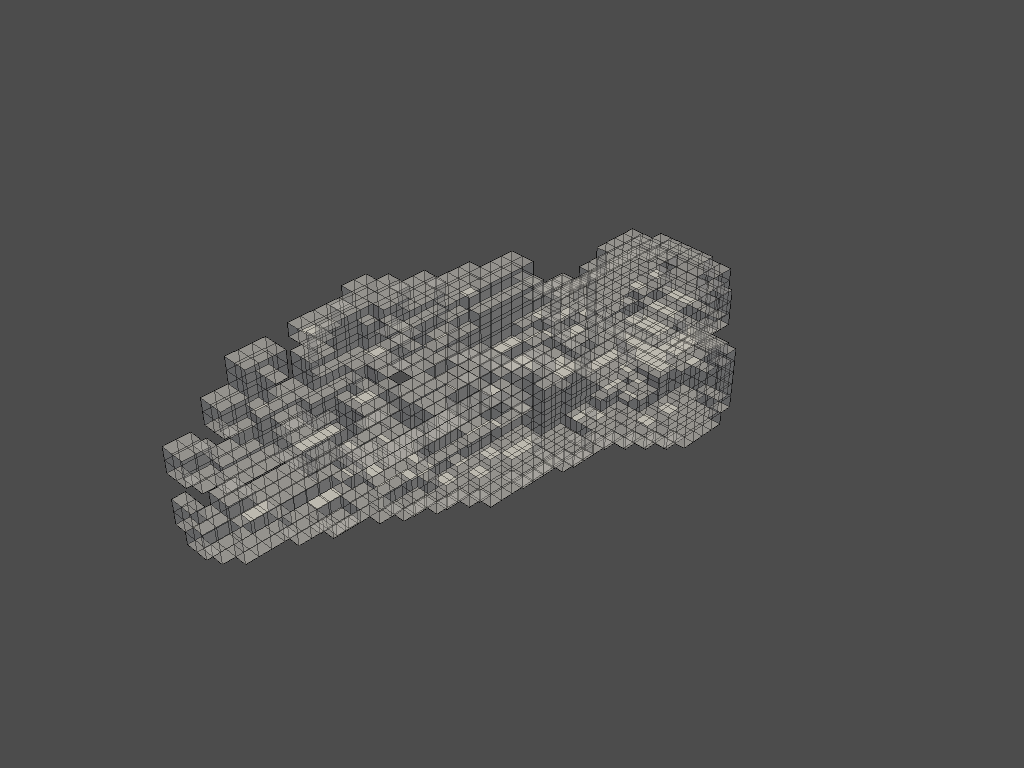

In [38]:
voxels = pv.voxelize(surface, density=surface.length/50)

p = pv.Plotter()
p.add_mesh(voxels, color=True, show_edges=True, opacity=0.5)
p.show()

In [39]:
pts = np.array(voxels.points)

In [40]:
len(voxels.cells)

20619

In [41]:
len(pts)

3539

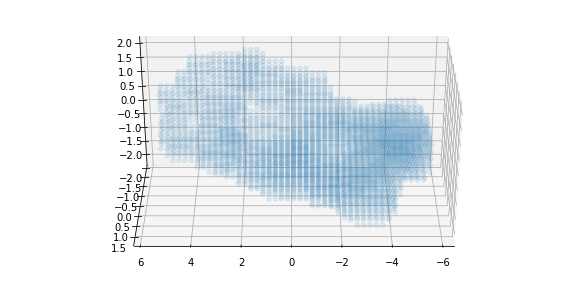

In [43]:
plt.figure(figsize=(10,5))
ax=plt.subplot(111,projection='3d')
ax.scatter(pts[:,0],pts[:,1],pts[:,2],alpha=.1)
ax.view_init(30,90)